In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
tf.__version__

'2.8.0'

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [5]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.57890224 0.5004708  0.53576493]
  [0.56629884 0.48786744 0.52316153]
  [0.5449824  0.46655095 0.50184506]
  ...
  [0.4428956  0.3409348  0.37622893]
  [0.44424307 0.34228227 0.37757638]
  [0.4586746  0.35671383 0.39200795]]

 [[0.58015716 0.50172573 0.5370199 ]
  [0.57194597 0.49351457 0.5288087 ]
  [0.5374528  0.45902145 0.49431556]
  ...
  [0.5188456  0.4168848  0.45217893]
  [0.5243701  0.42240927 0.45770338]
  [0.5055463  0.40358552 0.43887964]]

 [[0.58345175 0.5050204  0.5403145 ]
  [0.57366997 0.49523857 0.5305327 ]
  [0.54275364 0.46432227 0.49961638]
  ...
  [0.42706242 0.3251016  0.36039576]
  [0.41258746 0.3106267  0.3459208 ]
  [0.41697967 0.3150189  0.350313  ]]

 ...

 [[0.5183575  0.4556124  0.49482808]
  [0.5271419  0.4643968  0.5036125 ]
  [0.53592634 0.47318125 0.51239693]
  ...
  [0.48745555 0.40510258 0.44039673]
  [0.5504984  0.46814552 0.5034396 ]
  [0.50730664 0.4249537  0.46024784]]

 [[0.5568597  0.49411458 0.53333026]
  [0.54807526 0.48533016 0.52454585]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.6586113  0.6546897  0.725278  ]
  [0.67045546 0.6665339  0.7371221 ]
  [0.68229955 0.678378   0.7489662 ]
  ...
  [0.7436149  0.73969334 0.7945953 ]
  [0.7556802  0.75175864 0.8066606 ]
  [0.7181013  0.71417975 0.7690817 ]]

 [[0.6074101  0.60196316 0.67712736]
  [0.60318005 0.5981561  0.6720513 ]
  [0.59894997 0.5943491  0.66697526]
  ...
  [0.751652   0.74773043 0.8026324 ]
  [0.7467971  0.7428755  0.7977775 ]
  [0.7214854  0.7175638  0.77246577]]

 [[0.62085557 0.61301243 0.69536537]
  [0.62381655 0.6159734  0.69832635]
  [0.6267776  0.61893445 0.7012874 ]
  ...
  [0.7596891  0.7557675  0.8106695 ]
  [0.737914   0.73399246 0.7888944 ]
  [0.7248694  0.7209478  0.77584976]]

 ...

 [[0.49011114 0.4940327  0.5724641 ]
  [0.4117968  0.4131842  0.49098203]
  [0.5070082  0.49524352 0.5697533 ]
  ...
  [0.5234738  0.5117091  0.57837576]
  [0.5251658  0.5134011  0.58006775]
  [0.52685785 0.51509315 0.5817598 ]]

 [[0.47742102 0.48134258 0.559774  ]
  [0.42490995 0.4246053  0.5019801 ]


In [11]:
# Building the model
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [14]:
1506/32

47.0625

In [15]:
215/32

6.71875

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20


W0412 14:56:53.682274 26512 ag_logging.py:142] AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x0000020641471BF8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
47/47 [==============================] - ETA: 0s - loss: 0.8848 - accuracy: 0.5244

W0412 14:58:03.195932 26512 ag_logging.py:142] AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000020641471AE8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
47/47 [==============================] - 76s 2s/step - loss: 0.8848 - accuracy: 0.5244 - val_loss: 0.8183 - val_accuracy: 0.5990
Epoch 2/20
47/47 [==============================] - 77s 2s/step - loss: 0.6205 - accuracy: 0.7252 - val_loss: 0.4427 - val_accuracy: 0.8073
Epoch 3/20
47/47 [==============================] - 75s 2s/step - loss: 0.4289 - accuracy: 0.8263 - val_loss: 0.3540 - val_accuracy: 0.8594
Epoch 4/20
47/47 [==============================] - 77s 2s/step - loss: 0.3775 - accuracy: 0.8433 - val_loss: 0.4132 - val_accuracy: 0.8385
Epoch 5/20
47/47 [==============================] - 76s 2s/step - loss: 0.2379 - accuracy: 0.9030 - val_loss: 0.2999 - val_accuracy: 0.8750


In [17]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 8s 584ms/step - loss: 0.0620 - accuracy: 0.9861


In [18]:
scores

[0.06201845780014992, 0.9860788583755493]

In [28]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
len(history.history['loss'])

20

In [31]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.884814977645874,
 0.620488703250885,
 0.4289066195487976,
 0.37753936648368835,
 0.23794789612293243]

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [33]:
val_acc

[0.5989583134651184,
 0.8072916865348816,
 0.859375,
 0.8385416865348816,
 0.875,
 0.9270833134651184,
 0.9270833134651184,
 0.953125,
 0.953125,
 0.9635416865348816,
 0.9791666865348816,
 0.9583333134651184,
 0.8697916865348816,
 1.0,
 0.9895833134651184,
 0.9895833134651184,
 0.9322916865348816,
 0.9947916865348816,
 0.9427083134651184,
 0.9895833134651184]

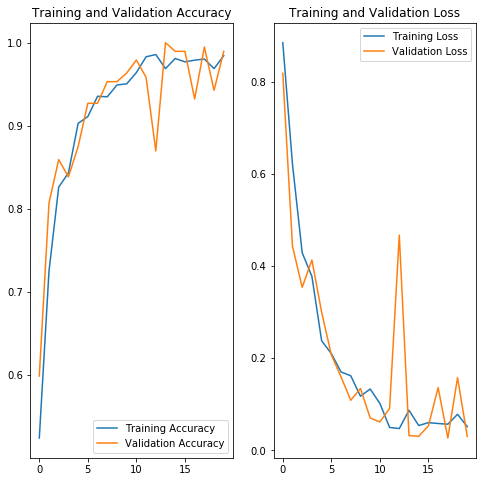

In [34]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


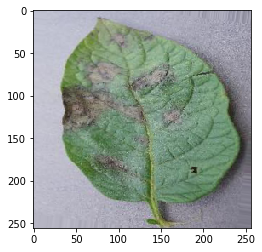

In [39]:
#Run prediction on sample image
import numpy as np


for images_batch, labels_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [42]:
#Predict function

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

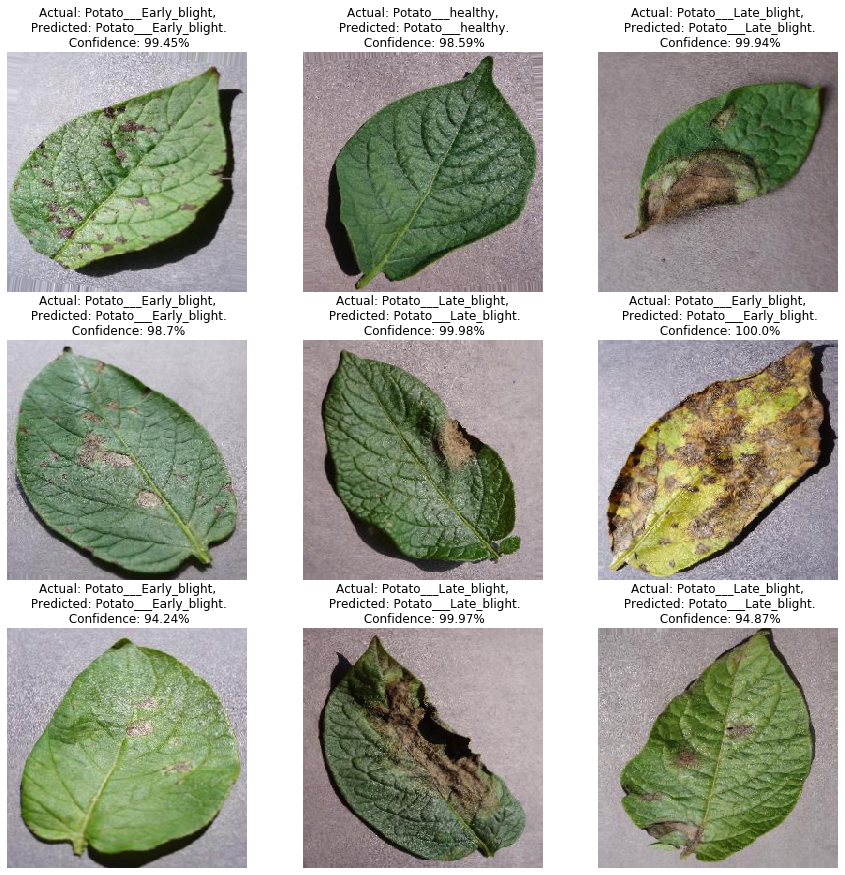

In [43]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [44]:
# Saving the Model
# Save model in h5 format so that there is just one file and we can upload that to GCP conveniently
model.save("../potatoes.h5")